In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit.simdir import SimDir
from kuibit.grid_data import UniformGrid

In [2]:
lin_data = np.genfromtxt("C:/Users/bgiacoma/Desktop/TOV_example/hydrobase-rho.maximum.asc")

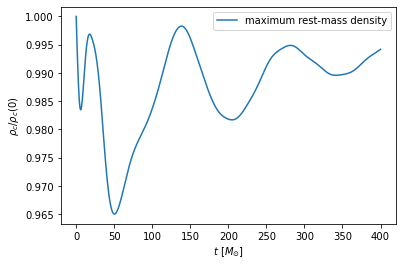

In [3]:
plt.plot(lin_data[:,1],lin_data[:,2]/lin_data[0,2], label="maximum rest-mass density")
plt.xlabel(r'$t$ [$M_{\odot}$]');
plt.ylabel(r'$\rho_c / \rho_c(0)$');
plt.legend();

In [4]:
gf = SimDir("C:/Users/bgiacoma/Desktop/TOV_example").gf

print(gf)


Available grid data of dimension 1D (x): 
[]


Available grid data of dimension 1D (y): 
[]


Available grid data of dimension 1D (z): 
[]


Available grid data of dimension 2D (xy): 
['alp', 'betax', 'betay', 'betaz', 'eps', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'H', 'M1', 'M2', 'M3', 'rho', 'vel[0]', 'vel[1]', 'vel[2]', 'w_lorentz']


Available grid data of dimension 2D (xz): 
['alp', 'betax', 'betay', 'betaz', 'eps', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'H', 'M1', 'M2', 'M3', 'rho', 'vel[0]', 'vel[1]', 'vel[2]', 'w_lorentz']


Available grid data of dimension 2D (yz): 
['alp', 'betax', 'betay', 'betaz', 'eps', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'H', 'M1', 'M2', 'M3', 'rho', 'vel[0]', 'vel[1]', 'vel[2]', 'w_lorentz']


Available grid data of dimension 3D (xyz): 
[]



In [5]:
vars2D = gf.xy
vars3D = gf.xyz

print(vars2D)
print(vars3D)


Available grid data of dimension 2D (xy): 
['alp', 'betax', 'betay', 'betaz', 'eps', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'H', 'M1', 'M2', 'M3', 'rho', 'vel[0]', 'vel[1]', 'vel[2]', 'w_lorentz']


Available grid data of dimension 3D (xyz): 
[]



In [6]:
rho = vars2D.fields.rho

In [7]:
print(rho.iterations)

[0, 2048, 4096, 6144, 8192, 10240, 12288, 14336, 16384, 18432, 20480, 22528, 24576, 26624, 28672, 30720, 32768, 34816, 36864, 38912, 40960, 43008, 45056, 47104, 49152, 51200, 53248, 55296, 57344, 59392, 61440, 63488, 65536, 67584, 69632, 71680, 73728, 75776, 77824, 79872, 81920, 83968, 86016, 88064, 90112, 92160, 94208, 96256, 98304, 100352, 102400, 104448, 106496, 108544, 110592, 112640, 114688, 116736, 118784, 120832, 122880, 124928, 126976, 129024, 131072, 133120, 135168, 137216, 139264, 141312, 143360, 145408, 147456, 149504, 151552, 153600, 155648, 157696, 159744, 161792, 163840, 165888, 167936, 169984, 172032, 174080, 176128, 178176, 180224, 182272, 184320, 186368, 188416, 190464, 192512, 194560, 196608, 198656, 200704, 202752, 204800, 206848, 208896, 210944, 212992, 215040, 217088, 219136, 221184, 223232, 225280, 227328, 229376, 231424, 233472, 235520, 237568, 239616, 241664, 243712, 245760, 247808, 249856, 251904, 253952, 256000, 258048, 260096, 262144, 264192, 266240, 268288, 

In [8]:
print(rho.available_times)

[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 58.0, 60.0, 62.0, 64.0, 66.0, 68.0, 70.0, 72.0, 74.0, 76.0, 78.0, 80.0, 82.0, 84.0, 86.0, 88.0, 90.0, 92.0, 94.0, 96.0, 98.0, 100.0, 102.0, 104.0, 106.0, 108.0, 110.0, 112.0, 114.0, 116.0, 118.0, 120.0, 122.0, 124.0, 126.0, 128.0, 130.0, 132.0, 134.0, 136.0, 138.0, 140.0, 142.0, 144.0, 146.0, 148.0, 150.0, 152.0, 154.0, 156.0, 158.0, 160.0, 162.0, 164.0, 166.0, 168.0, 170.0, 172.0, 174.0, 176.0, 178.0, 180.0, 182.0, 184.0, 186.0, 188.0, 190.0, 192.0, 194.0, 196.0, 198.0, 200.0, 202.0, 204.0, 206.0, 208.0, 210.0, 212.0, 214.0, 216.0, 218.0, 220.0, 222.0, 224.0, 226.0, 228.0, 230.0, 232.0, 234.0, 236.0, 238.0, 240.0, 242.0, 244.0, 246.0, 248.0, 250.0, 252.0, 254.0, 256.0, 258.0, 260.0, 262.0, 264.0, 266.0, 268.0, 270.0, 272.0, 274.0, 276.0, 278.0, 280.0, 282.0, 284.0, 286.0, 288.0, 290.0, 292.0, 294.0, 296.0, 298.0, 300.

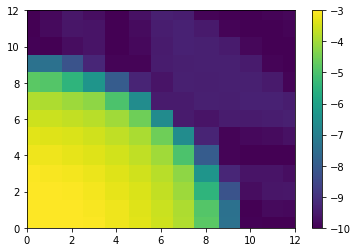

In [9]:
small_grid = UniformGrid([100, 100], x0=[0, 0], x1=[12,12])

rho_small = rho.read_on_grid(409600, small_grid)

#cf = plt.contourf(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
cf = plt.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
plt.colorbar(cf)

In [10]:
#for i in rho.iterations:
#    print(i)
#    rho_small = rho.read_on_grid(i, small_grid)
#    cf2=plt.contourf(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
#    plt.savefig("frame_"+str(i)+".png")

In [46]:
from IPython.display import HTML
import matplotlib.animation as animation
ims = []
fig,ax = plt.subplots()

for i in rho.iterations[0::1]:
    rho_small = rho.read_on_grid(i, small_grid)
    ax.set_xlabel(r'$x (M_\odot)$')
    ax.set_ylabel(r'$y (M_\odot)$')
    ax.set_aspect('equal')
    im = ax.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), animated=True, vmin=-10, vmax=-3)
    plt.plot()
    plt.colorbar(im)
    title = ax.text(0.5,1.05,('Time='+str(rho.available_times[i//2048])), size=plt.rcParams["axes.titlesize"], ha="center", transform=ax.transAxes)
    ims.append([im, title])
    plt.close()
    

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_jshtml())